In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import display
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.templates.default = 'plotly_white'
import logging
import logzero
logzero.loglevel(logging.INFO)

# Move to the data directory

In [1]:
dir_fname = "work/"

In [2]:
import os
os.chdir(dir_fname)

In [4]:
!(ls -l)

total 244512
drwxr-xr-x 2 yoshihiko_s users        38 Sep 11 17:45 datander
drwxr-xr-x 2 yoshihiko_s users      4096 Sep 11 17:59 datruf
-rw-r--r-- 1 yoshihiko_s users       250 Sep 11 17:34 DMEL.db
-rw-r--r-- 1 yoshihiko_s users  70975912 Sep 11 17:46 TAN.DMEL.las
-rw-r--r-- 1 yoshihiko_s users 179390870 Sep 11 18:00 tr_reads.pkl


# Input

* DAZZ_DB file
* Output `.las` file by datander

In [11]:
db_prefix = "DMEL"
db_fname = f"{db_prefix}.db"
las_fname = f"TAN.{db_prefix}.las"

* One of the followings **(Specified when plotting)**:
  1. Read ID in DAZZ_DB as `int`; or
  2. `TRRead` object in `tr_reads.pkl` generated by datruf

## Optional

* Gepard command **(for dot plot)**

In [12]:
gepard_root = "/work2/yoshihiko_s/software/gepard"
gepard_jar = f"{gepard_root}/dist/Gepard-1.40.jar"
gepard_mat = f"{gepard_root}/resources/matrices/edna.mat"
gepard = f"java -cp {gepard_jar} org.gepard.client.cmdline.CommandLine -matrix {gepard_mat}"

# Output

* Interactive plot of a read with self alignments, tandem repeats, and tandem repeat units
* Static dot plot image (if `gepard` is given)

# How to run

In [13]:
from vca import ReadViewer

## Docstring

In [8]:
ReadViewer?

```
Init signature:
ReadViewer(
    db_fname: str,
    las_fname: str,
    gepard: str = None,
    out_dir: str = 'tmp',
) -> None
Docstring:     
Class for plotting reads in Jupyter Notebook.
First create an instance of this class with .db and .las files,
and then show plot by specifying a read ID or TRRead object.
You can draw self dot plot with Gepard by giving its command.

Usage example (in Jupyter Notebook):
  > from vca import ReadViewer
  > v = ReadViewer(db_fname, las_fname)
  > v.show(read_id)
```

## Execution

In [15]:
v = ReadViewer(db_fname, las_fname, gepard=gepard)

### Plot with read ID

If you just want to look at only TR intervals and self alignments:

In [16]:
v.show(read_id=165)

You can also plot with a dot plot generated with Gepard:

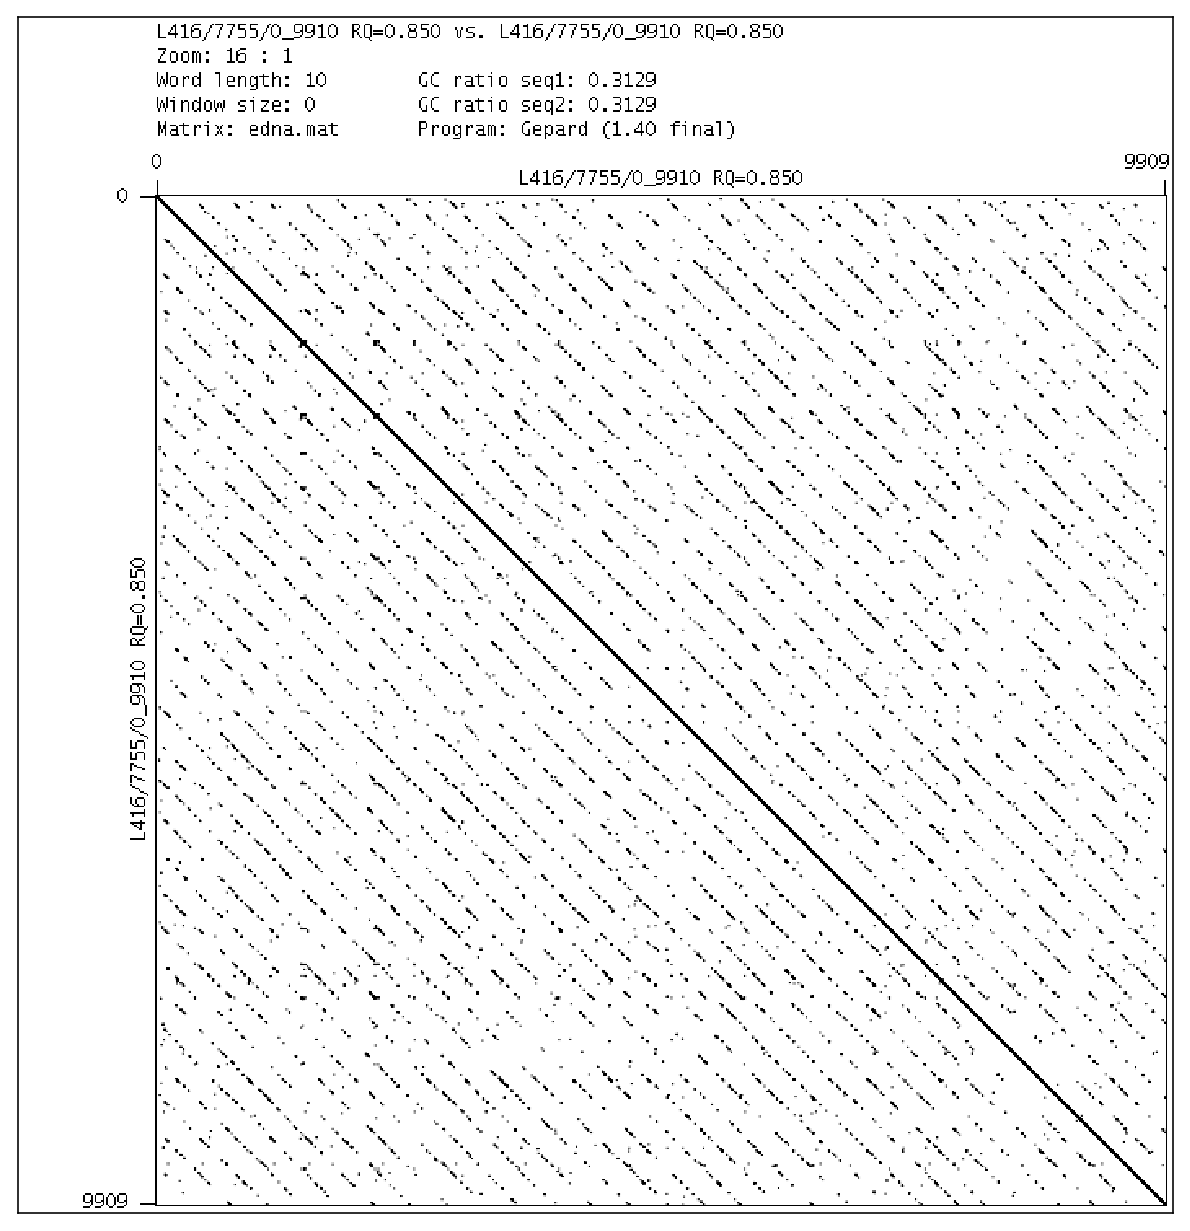

In [22]:
v.show(read_id=165, dot_plot=True)

### Plot with `TRRead` object

First load the `TRRead` objects with read IDs as keys:

In [19]:
from BITS.util.io import load_pickle

In [17]:
tr_reads_fname = "tr_reads.pkl"   # or "centromere_reads.pkl" after centromeric read filtering

In [20]:
tr_reads = {read.id: read for read in load_pickle(tr_reads_fname)}

This will show additional information on the TR units:

In [21]:
v.show(read=tr_reads[165])